# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Create an empty data frame to save the data
cities_pd = pd.DataFrame(columns = ["City","Cloudiness","Country","Date","Humidity","Lat","Lng","Max Temp","Wind Speed"])

In [6]:
print("Beginning Data Retrieval\n-----------------------------")
base_url = "https://api.openweathermap.org/data/2.5/find?units=imperial"
total_counts = len(cities)
for city in cities:
    address = city
    query_url = f"{base_url}&q={address}&appid={api_key}"
    try:
        response = requests.get(query_url).json()
        #proceed after 0.05 second
        time.sleep(0.05)
        #check if the city is in the database
        response["count"]==1
        #update the data frame with new row of data for each city
        cities_pd.loc[cities.index(city)] = [city,response["list"][0]["clouds"]["all"],response["list"][0]["sys"]["country"],response["list"][0]["dt"],response["list"][0]["main"]["humidity"],response["list"][0]["coord"]["lat"],response["list"][0]["coord"]["lon"],response["list"][0]["main"]["temp_max"],response["list"][0]["wind"]["speed"]]
        print(f"Processing Record {cities.index(city)+1} of {total_counts} | {city}")
        
    except:
        print("City not found. Skipping...")
        #total_cities = len(cities)-1 #update the total number of cities
        #del(cities[cities.index(city)]) #delete this unfound city from the cities list



Beginning Data Retrieval
-----------------------------
Processing Record 1 of 610 | lorengau
Processing Record 2 of 610 | upernavik
City not found. Skipping...
Processing Record 4 of 610 | praia da vitoria
City not found. Skipping...
Processing Record 6 of 610 | utete
Processing Record 7 of 610 | araouane
Processing Record 8 of 610 | omboue
Processing Record 9 of 610 | albany
Processing Record 10 of 610 | chizhou
Processing Record 11 of 610 | busselton
Processing Record 12 of 610 | ushuaia
Processing Record 13 of 610 | talnakh
Processing Record 14 of 610 | lisbon
Processing Record 15 of 610 | jamestown
Processing Record 16 of 610 | ponta do sol
Processing Record 17 of 610 | rikitea
City not found. Skipping...
Processing Record 19 of 610 | provideniya
Processing Record 20 of 610 | khuzdar
Processing Record 21 of 610 | cidreira
Processing Record 22 of 610 | ahipara
Processing Record 23 of 610 | puerto escondido
Processing Record 24 of 610 | carnarvon
Processing Record 25 of 610 | burayda

Processing Record 211 of 610 | salalah
Processing Record 212 of 610 | mehamn
Processing Record 213 of 610 | naberera
City not found. Skipping...
Processing Record 215 of 610 | faanui
City not found. Skipping...
City not found. Skipping...
Processing Record 218 of 610 | sampit
Processing Record 219 of 610 | puerto quijarro
City not found. Skipping...
Processing Record 221 of 610 | nouadhibou
Processing Record 222 of 610 | iqaluit
Processing Record 223 of 610 | aksarka
City not found. Skipping...
Processing Record 225 of 610 | pankrushikha
Processing Record 226 of 610 | ati
Processing Record 227 of 610 | qaanaaq
Processing Record 228 of 610 | bandarbeyla
Processing Record 229 of 610 | kpandu
Processing Record 230 of 610 | cockburn town
City not found. Skipping...
Processing Record 232 of 610 | vidim
Processing Record 233 of 610 | moron
Processing Record 234 of 610 | beloha
Processing Record 235 of 610 | grindavik
Processing Record 236 of 610 | arraial do cabo
Processing Record 237 of 610

Processing Record 423 of 610 | tomatlan
Processing Record 424 of 610 | pedernales
Processing Record 425 of 610 | poum
Processing Record 426 of 610 | dixon
Processing Record 427 of 610 | hare bay
Processing Record 428 of 610 | maceio
Processing Record 429 of 610 | tokat
Processing Record 430 of 610 | galion
Processing Record 431 of 610 | gua musang
Processing Record 432 of 610 | bushehr
Processing Record 433 of 610 | murwillumbah
Processing Record 434 of 610 | redlands
City not found. Skipping...
Processing Record 436 of 610 | kodiak
Processing Record 437 of 610 | kutum
Processing Record 438 of 610 | yate
Processing Record 439 of 610 | pio ix
City not found. Skipping...
Processing Record 441 of 610 | payo
Processing Record 442 of 610 | asopos
Processing Record 443 of 610 | zmeinogorsk
Processing Record 444 of 610 | fairbanks
Processing Record 445 of 610 | outjo
Processing Record 446 of 610 | broken hill
Processing Record 447 of 610 | cayambe
Processing Record 448 of 610 | okhotsk
City n

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
#reset the index
cities_pd.reset_index(inplace=True)
cities_pd.drop(columns="index",inplace=True)
#export the city data into a .csv
cities_pd.to_csv("Cities.csv")

In [8]:
cities_pd.count()

City          539
Cloudiness    539
Country       539
Date          539
Humidity      539
Lat           539
Lng           539
Max Temp      539
Wind Speed    539
dtype: int64

In [9]:
cities_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lorengau,100,PG,1572908984,88,-2.0226,147.2712,76.27,7.11
1,upernavik,4,GL,1572909128,55,72.7868,-56.1549,18.76,6.85
2,praia da vitoria,75,PT,1572909126,72,38.7333,-27.0667,60.80,11.27
3,utete,5,TZ,1572908946,89,-7.9860,38.7580,74.18,0.98
4,araouane,14,ML,1572909043,17,18.9041,-3.5276,82.01,9.01


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0.5, 1.0, 'City Latitude vs. Max Temperature ()')

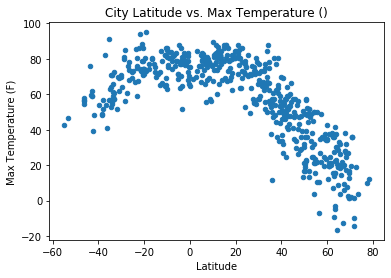

In [22]:
cities_pd["Max Temp"] = pd.to_numeric(cities_pd["Max Temp"],errors='coerce')
cities_pd.plot("Lat","Max Temp",kind="scatter")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature ()")

#### Latitude vs. Humidity Plot

Text(0.5, 1.0, 'City Latitude vs. Humidity ()')

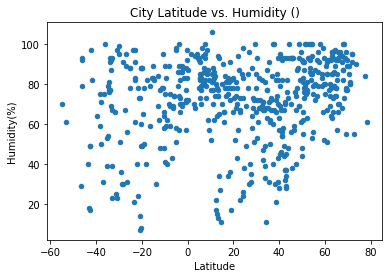

In [23]:
cities_pd["Humidity"] = pd.to_numeric(cities_pd["Humidity"],errors='coerce')
cities_pd.plot("Lat","Humidity",kind="scatter")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title(f"City Latitude vs. Humidity ()")

#### Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'City Latitude vs. Cloudiness ()')

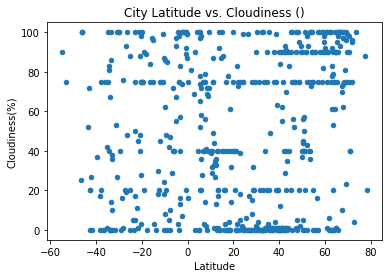

In [24]:
cities_pd["Cloudiness"] = pd.to_numeric(cities_pd["Cloudiness"],errors='coerce')
cities_pd.plot("Lat","Cloudiness",kind="scatter")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title(f"City Latitude vs. Cloudiness ()")

#### Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'City Latitude vs. Wind Speed ()')

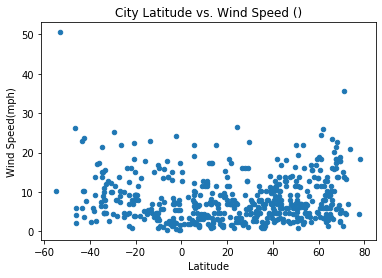

In [25]:
cities_pd["Wind Speed"] = pd.to_numeric(cities_pd["Wind Speed"],errors='coerce')
cities_pd.plot("Lat","Wind Speed",kind="scatter")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title(f"City Latitude vs. Wind Speed ()")

# three observable trends based on the data# Three 
1. 